In [18]:
import cv2


In [19]:
import matplotlib.pyplot as plt

In [20]:
config_file = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model ="frozen_inference_graph.pb"

In [21]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [22]:
ClassLabels = []
file_name = "labels.txt"
with open (file_name,'rt') as fpt:
    ClassLabels =fpt.read().rstrip('\n').split('\n')

In [23]:
print(ClassLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [24]:
print(len(ClassLabels))

80


In [28]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 000001FF87F85E10>

In [25]:
img = cv2.imread('car_Person.jpeg')

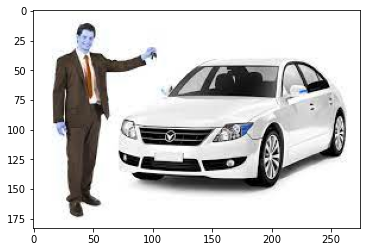

In [26]:
plt.imshow(img)

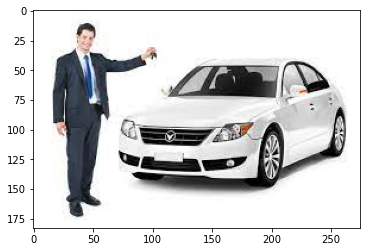

In [27]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [29]:
ClassIndex, confidece, bbox = model.detect(img,confThreshold=0.5)

In [30]:
print(ClassIndex)

[[ 3]
 [ 1]
 [32]]


In [33]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip (ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,ClassLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale = font_scale, color =(0,255,0), thickness =1 )

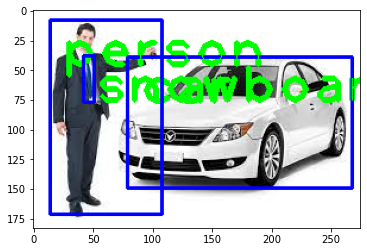

In [34]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [17]:
cap = cv2.VideoCapture(1)


#Check For the Web Cam
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Can't Open Web Cam")
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    ClassIndex, confidece, bbox = model.detect(frame,confThreshold=0.55)
    
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip (ClassIndex.flatten(), confidece.flatten(), bbox):
            if(ClassInd<=80):
                cv2.rectangle(img,boxes,(255,0,0),2)
                cv2.putText(frame,ClassLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale = font_scale, color =(0,255,0), thickness =3 )
    
    cv2.imshow('Agro Guru Object detection', frame)
    
    if cv2.waitkey(2) & 0XFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()
    
                
    

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
